In [107]:
import pandas as pd
import numpy as np

In [108]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.datasets import make_regression
from sklearn.impute import KNNImputer,SimpleImputer

In [109]:

X, y = make_regression(n_samples=20, n_features=1, noise=5, random_state=42)
print(X.shape)
print(y.shape)
dt = pd.DataFrame(zip(X.flat, y), columns = ['X', 'y'])
dt.sort_values('X', inplace =True)
# dt  =dt.reset_index(drop =1)
print(dt)

(20, 1)
(20,)
           X          y
15 -1.913280 -87.286608
3  -1.724918 -79.815577
5  -1.412304 -58.442734
7  -1.012831 -52.517783
4  -0.908024 -27.520687
13 -0.562288 -23.697502
10 -0.469474 -19.956148
18 -0.465730 -22.049313
6  -0.463418 -26.242851
8  -0.234153 -10.067937
2  -0.234137 -13.255462
17 -0.138264  -3.317217
9   0.241962   8.366929
19  0.314247  19.791839
1   0.496714  19.506267
16  0.542560  21.566736
0   0.647689  42.336570
12  0.767435  39.737594
14  1.523030  71.431985
11  1.579213  69.021887


In [110]:
import matplotlib.pyplot as plt

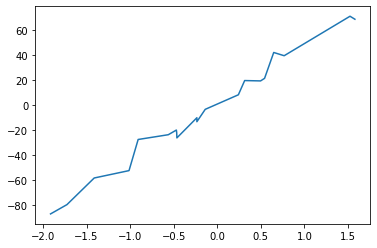

In [111]:
plt.plot(dt['X'],dt['y']  )

In [112]:
dt_nan =dt.copy()

dt.iat[3, 0] = np.nan
dt.iat[10, 0] = np.nan
dt.iat[12, 0] = np.nan
dt.iat[5,0] = np.nan
print(dt.head())
print(dt_nan.head())

           X          y
15 -1.913280 -87.286608
3  -1.724918 -79.815577
5  -1.412304 -58.442734
7        NaN -52.517783
4  -0.908024 -27.520687
           X          y
15 -1.913280 -87.286608
3  -1.724918 -79.815577
5  -1.412304 -58.442734
7  -1.012831 -52.517783
4  -0.908024 -27.520687


In [113]:
dt_inter = dt.interpolate()
dt_fill = dt.ffill()



In [114]:

imp = IterativeImputer(random_state=0)
np1 = dt[['X', 'y']].to_numpy()
np2 = imp.fit_transform(np1)
simpl = SimpleImputer()
np3 = simpl.fit_transform(np1)
kn  = KNNImputer()
np4 = kn.fit_transform(np1)




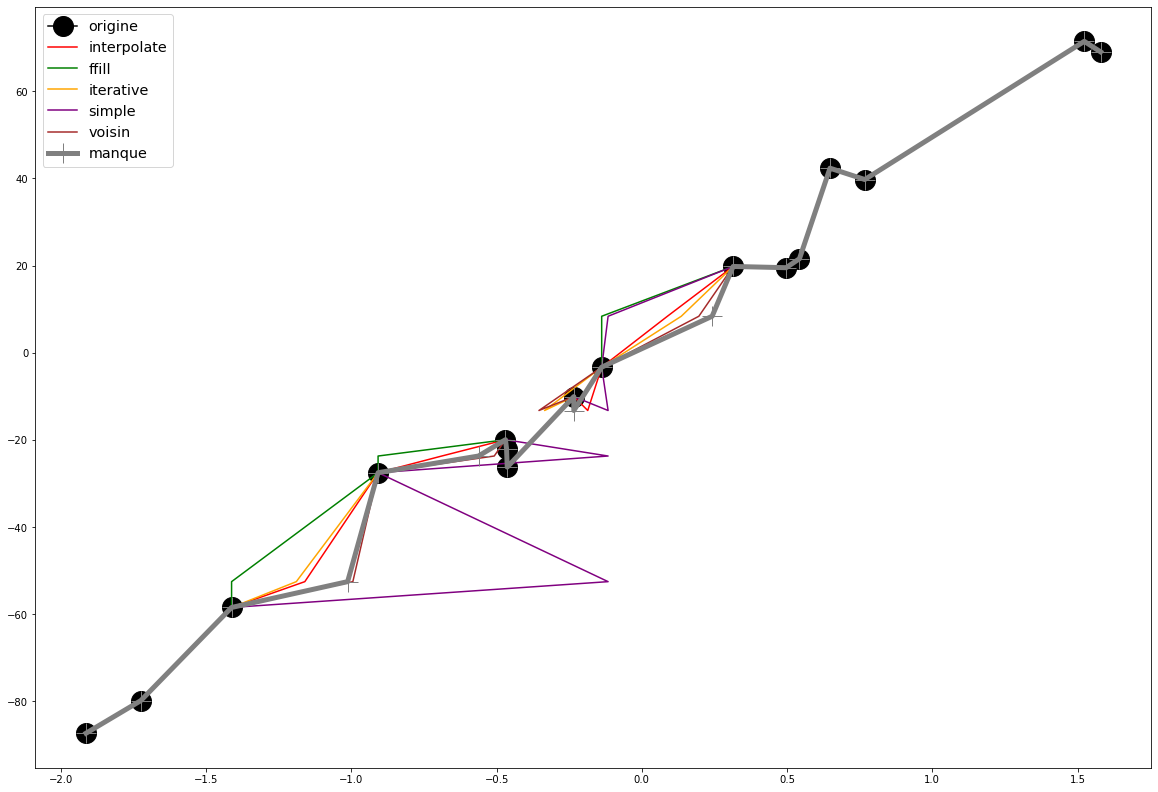

In [115]:
plt.figure(figsize = (20, 14))
plt.plot(dt['X'],dt['y'] , color = 'black', marker = 'o',markersize =20)
plt.plot(dt_inter['X'],dt_inter['y'] , color = 'red' )
plt.plot(dt_fill['X'],dt_fill['y'] , color = 'green' )
plt.plot(np2[:,0] ,np2[:,1], color = 'orange' )
plt.plot(np3[:,0] ,np3[:,1], color = 'purple' )
plt.plot(np4[:,0] ,np4[:,1], color = 'brown' )
plt.plot(dt_nan['X'],dt_nan['y'] , color = 'grey', linewidth='5' ,marker ='+', markersize = 20)
plt.legend( ['origine', 'interpolate', 'ffill' , 'iterative' , 'simple', 'voisin','manque'], fontsize ='x-large')


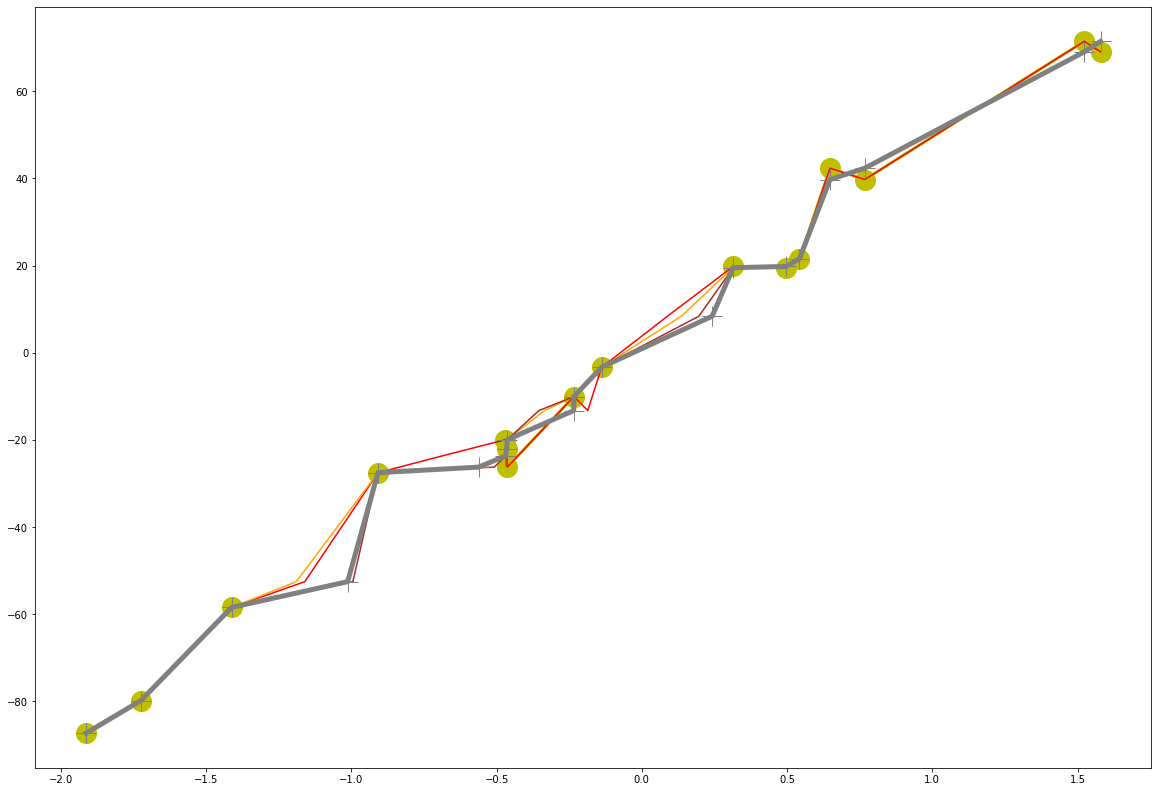

In [116]:
plt.figure(figsize = (20, 14))
plt.plot(dt['X'],dt['y'] , color = 'y', marker = 'o',markersize =20,linewidth = '3')
plt.plot(dt_inter['X'],dt_inter['y'] , color = 'red' )
plt.plot(sorted(np2[:,0]) ,sorted(np2[:,1]), color = 'orange' )
#plt.plot(sorted(np3[:,0]) ,sorted(np3[:,1]), color = 'purple' )
plt.plot(sorted(np4[:,0]) ,sorted(np4[:,1]), color = 'brown' )
plt.plot(sorted(dt_nan['X']),sorted(dt_nan['y']) , color = 'grey', linewidth='5' ,marker ='+', markersize = 20)

In [59]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       16 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [69]:
dt.isnull()

,X,y
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False
5,True,False
6,False,False
7,False,False
8,False,False
9,False,False


In [84]:
dt[dt.isnull().values]

,X,y
3,NaN,-52.517783
5,NaN,-23.697502
10,NaN,-13.255462
12,NaN,8.366929


In [85]:
dc = dt.copy()

In [99]:
dt.bfill()

,X,y
0,-1.913280,-87.286608
1,-1.724918,-79.815577
2,-1.412304,-58.442734
3,-0.908024,-52.517783
4,-0.908024,-27.520687
5,-0.469474,-23.697502
6,-0.469474,-19.956148
7,-0.465730,-22.049313
8,-0.463418,-26.242851
9,-0.234153,-10.067937


In [125]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(dt_nan.X, np3[:,0] ))# SimpleImputer
print(mean_squared_error(dt_nan.X, np4[:,0] )) #KNNImputer
print(mean_squared_error(dt_nan.X, np2[:,0] )) # iterativeImputer
print(mean_squared_error(dt_nan.X, dt_inter.X )) #pandas interpolate


0.05726013724292493
0.000988070710285649
0.002632595263623769
0.003185180237325761


In [120]:
dt_nan.y

15   -87.286608
3    -79.815577
5    -58.442734
7    -52.517783
4    -27.520687
13   -23.697502
10   -19.956148
18   -22.049313
6    -26.242851
8    -10.067937
2    -13.255462
17    -3.317217
9      8.366929
19    19.791839
1     19.506267
16    21.566736
0     42.336570
12    39.737594
14    71.431985
11    69.021887
Name: y, dtype: float64

In [121]:
np3[:,1]

array([-87.28660841, -79.81557713, -58.44273406, -52.51778288,
       -27.52068737, -23.69750189, -19.95614757, -22.04931307,
       -26.24285096, -10.06793677, -13.25546214,  -3.31721743,
         8.36692892,  19.79183892,  19.50626679,  21.56673635,
        42.33657029,  39.73759359,  71.43198537,  69.02188713])